Bagian C

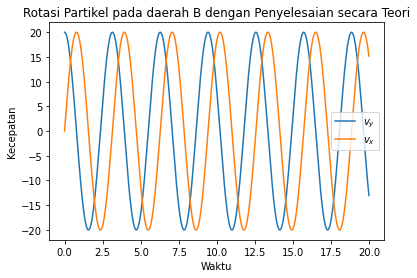

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(0, 20, 0.01)
k=2

plt.figure()
plt.plot(t, 20*np.cos(k*t), t, 20*np.sin(k*t))
plt.title('Rotasi Partikel pada daerah B dengan Penyelesaian secara Teori')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

Bagian D

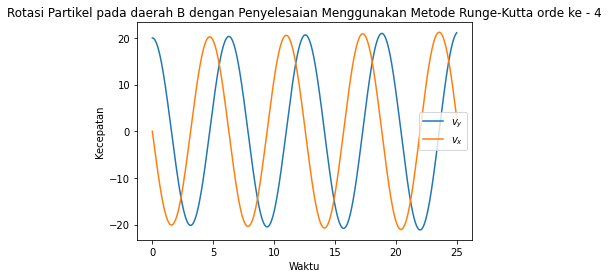

In [4]:
#Menggunakan metode Runge-Kutta
def rk4(F,t,x,y,h): 
    K0 = h*F(t,x,y)
    K1 = h*F(t + h/2.0, x + K0/2.0, y)
    K2 = h*F(t + h/2.0, x + K1/2.0, y)
    K3 = h*F(t +h, x + K2, y)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0

#Definisikan persamaan diferensial terkopel
def vx_dot(t,vx,vy,q=1, Bz=1, m=1):
  return -q*Bz/m*vy

def vy_dot(t,vy,vx,q=1, Bz=1, m=1):
  return q*Bz/m*vx

#Definisikan kondisi awal
vx_init = 0 #kecepatan tangensial dari rotasi
vy_init = 20 
t_init = 0
t_stop = 25
h = 0.005

vxs=[vx_init]
vys=[vy_init]
ts=[t_init]

#Iterasi metode runge-kutta
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + rk4(vx_dot,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + rk4(vy_dot,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

#plot kecepatan pada arah x dan y tiap waktu
plt.figure()
plt.plot(ts,vys,ts,vxs)
plt.title('Rotasi Partikel pada daerah B dengan Penyelesaian Menggunakan Metode Runge-Kutta orde ke - 4')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()